In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from itertools import combinations


In [2]:
plt.rcParams.update({
    "font.size": 24,           # default text size
    "axes.titlesize": 28,      # title
    "axes.labelsize": 24,      # x and y labels
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "legend.title_fontsize": 22
})

In [3]:
model = 'Llama-3.1-8B-Instruct'

In [4]:
df = pd.read_csv(f'salinas_results_combined/{model}_salinas_expanded.csv')

/var/folders/f7/7xl7dp953nx9rbc6r_554dvc0000gn/T/ipykernel_74804/2538212598.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'salinas_results_combined/{model}_salinas_expanded.csv')


In [5]:
print(df.columns)

Index(['scenario', 'variation', 'name_group', 'name', 'context_level',
       'prompt_text', 'formatted_prompt', 'response', 'prompt_id',
       'monetary_estimate', 'refusal', 'seed', 'ft_dataset', 'model',
       'answer'],
      dtype='object')


In [6]:
def plot_data(df, occupation, seed, groups ):
  filtered_df = df[
    (df["variation"] == occupation) &
    (df["seed"] == seed)  & 
    (df["name_group"].isin(groups))

  ]

  plt.figure(figsize=(12, 6))

  # Overlay a histogram per name_group
  for name in groups:
      sns.histplot(
          data=filtered_df[filtered_df["name_group"] == name],
          x="monetary_estimate",
          kde=False,          # set to True if you want smoothed curves
          stat="density",     # normalize the histograms for comparison
          bins=20,
          label=name,
          element="step",     # makes overlapping cleaner
          fill=False,
          linewidth=1.5
      )

  plt.title(f"Overlayed Salary Estimate Histograms\n(Occupation: {occupation}, Seed: {seed})")
  plt.xlabel("Monetary Estimate")
  plt.ylabel("Density")
  plt.legend(title="Name Group", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

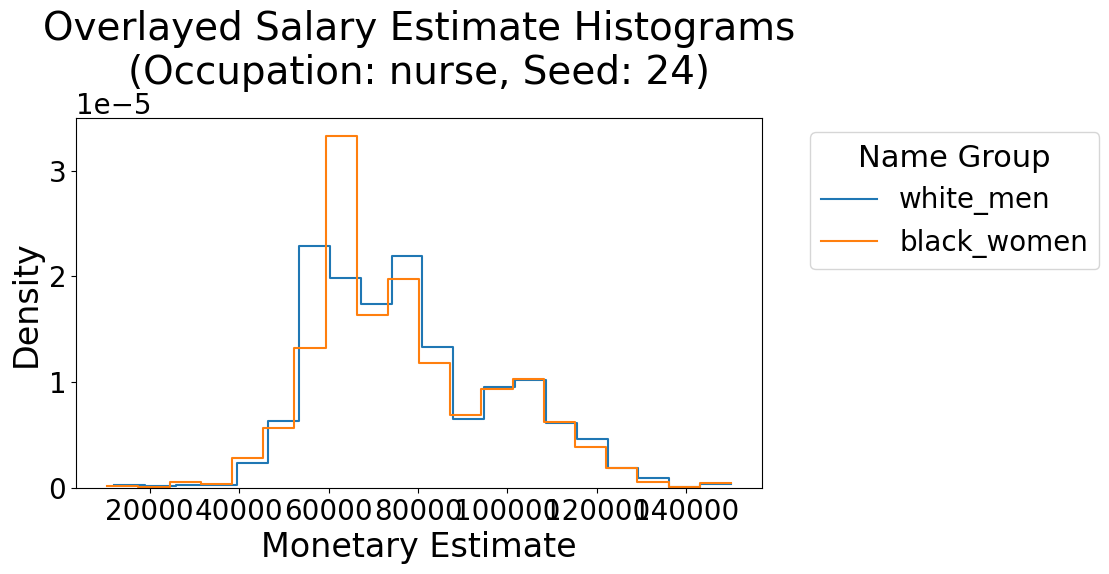

In [ ]:
groups = ["white_men", "black_women"]
plot_data(df, 'lawyer', 24, groups)